In [2]:
import pandas as pd
from sqlalchemy import create_engine, inspect,text
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# Database path in the schema folder
db_path = '../../../Schema/student_database.db'

engine = create_engine(f'sqlite:///{db_path}')

with engine.connect() as conn:
    print("Connected to the database.")
    
    inspector = inspect(engine)
    tables = inspector.get_table_names()
    print("Tables in the database:", tables)

Connected to the database.
Tables in the database: ['student_performance']


In [4]:
query = "SELECT * FROM student_performance;"
df = pd.read_sql(query, con=engine)
df.shape

(100, 47)

## 1. Are students who utilize counseling services more likely to succeed academically?

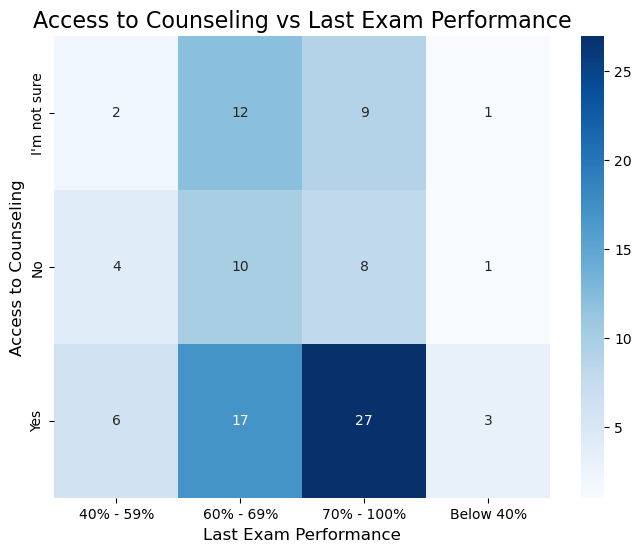

Last Exam Performance,40% - 59%,60% - 69%,70% - 100%,Below 40%
Access to Counseling,,,,
I'm not sure,2,12,9,1
No,4,10,8,1
Yes,6,17,27,3


In [39]:
# Contingency table for Access to Counseling and Last Exam Performance
counseling_performance = pd.crosstab(df['Access to Counseling'], df['Last Exam Performance'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(counseling_performance, annot=True, cmap='Blues', fmt='d')
plt.title('Access to Counseling vs Last Exam Performance', fontsize=16)
plt.xlabel('Last Exam Performance', fontsize=12)
plt.ylabel('Access to Counseling', fontsize=12)
image_path = '../../../docs/5.png'  
plt.savefig(image_path)
plt.show()

counseling_performance

### Insight: Access to Counseling and Academic Performance

- **Students with access to counseling services (Yes)**: A significant number of students (27) who have access to counseling services performed in the **70% - 100%** range. This indicates that counseling may be positively associated with higher performance.
  
- **Students without access to counseling (No)**: A smaller number of students (8) achieved a performance in the **70% - 100%** range compared to those who had access to counseling. Most students without counseling services tended to perform between **60% - 69%**.

- **Students who are unsure about access to counseling (I'm not sure)**: Interestingly, those unsure about access also performed decently, with **9 students** scoring in the **70% - 100%** range. However, the majority are clustered around the **60% - 69%** range.

This suggests that access to counseling services might contribute to higher academic performance, but the effect is not entirely exclusive, as a few students without counseling still perform well.


## 2. How does language spoken at home impact students' confidence in academic settings, especially in communication-heavy subjects like English?

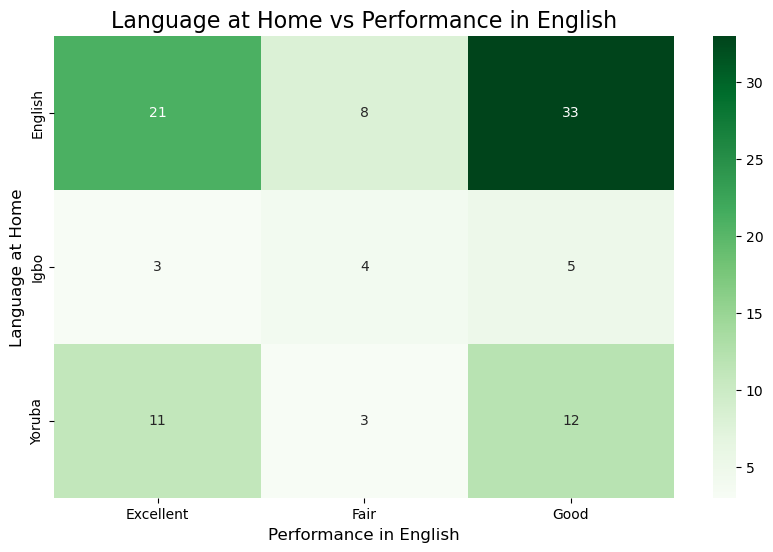

Performance in English,Excellent,Fair,Good
Language at Home,,,
English,21,8,33
Igbo,3,4,5
Yoruba,11,3,12


In [41]:
# Contingency table for Language at Home and Performance in English
language_english_performance = pd.crosstab(df['Language at Home'], df['Performance in English'])

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(language_english_performance, annot=True, cmap='Greens', fmt='d')
plt.title('Language at Home vs Performance in English', fontsize=16)
plt.xlabel('Performance in English', fontsize=12)
plt.ylabel('Language at Home', fontsize=12)
image_path = '../../../docs/6.png'  
plt.savefig(image_path)
plt.show()

language_english_performance

### Insight: Language Spoken at Home and Performance in English

- **Students who speak English at home**: The majority of students who speak English at home performed well, with **33 students** achieving a **Good** performance and **21 students** achieving an **Excellent** performance. This indicates a strong relationship between speaking English at home and excelling in English as a subject.

- **Students who speak Igbo at home**: Only a small number of Igbo-speaking students performed **Excellent** (**3 students**), with most falling into the **Fair** and **Good** categories. This suggests that non-English speakers at home may face some challenges in excelling in English.

- **Students who speak Yoruba at home**: Yoruba-speaking students performed relatively well, with **12 students** achieving a **Good** performance and **11 students** an **Excellent** performance. This implies that students who speak Yoruba at home also tend to do well in English, possibly due to stronger bilingual or language support systems.

Overall, students who speak English at home are more likely to excel in English as a subject, while those who speak other languages at home show a more mixed performance in comparison.


## 3. How do stress levels about schoolwork vary among students based on their foundational knowledge?

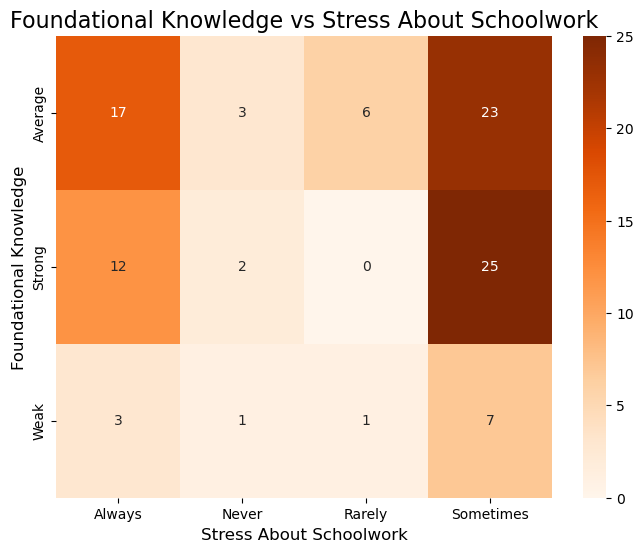

Stress About Schoolwork,Always,Never,Rarely,Sometimes
Foundational Knowledge,,,,
Average,17,3,6,23
Strong,12,2,0,25
Weak,3,1,1,7


In [43]:
# Contingency table for Foundational Knowledge and Stress About Schoolwork
knowledge_stress = pd.crosstab(df['Foundational Knowledge'], df['Stress About Schoolwork'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(knowledge_stress, annot=True, cmap='Oranges', fmt='d')
plt.title('Foundational Knowledge vs Stress About Schoolwork', fontsize=16)
plt.xlabel('Stress About Schoolwork', fontsize=12)
plt.ylabel('Foundational Knowledge', fontsize=12)
image_path = '../../../docs/7.png'  
plt.savefig(image_path)
plt.show()

knowledge_stress

### Insight: Stress About Schoolwork vs. Foundational Knowledge

- **Students with Average Foundational Knowledge**: A significant portion of students with average foundational knowledge experience stress frequently, with **17 students** reporting they are **Always** stressed and **23 students** feeling stress **Sometimes**. This suggests that students with average foundational knowledge may struggle more to handle schoolwork stress compared to their peers.

- **Students with Strong Foundational Knowledge**: Students with strong foundational knowledge generally report less stress, with **12 students** feeling stressed **Always** and **25 students** stressed **Sometimes**. Interestingly, none of these students report **Rarely** feeling stressed, indicating that while strong foundational knowledge reduces stress, these students are still prone to feeling the pressure from schoolwork.

- **Students with Weak Foundational Knowledge**: Students with weak foundational knowledge report lower overall stress levels, with only **3 students** reporting they are **Always** stressed. However, the small group size suggests they may struggle with schoolwork at a different pace, experiencing stress less frequently but still vulnerable to its effects.

Overall, students with **average foundational knowledge** tend to experience more stress related to schoolwork, while those with **strong foundational knowledge** manage stress better, though they are still not immune to it.


## 4. What is the relationship between parents attending meetings and student performance?

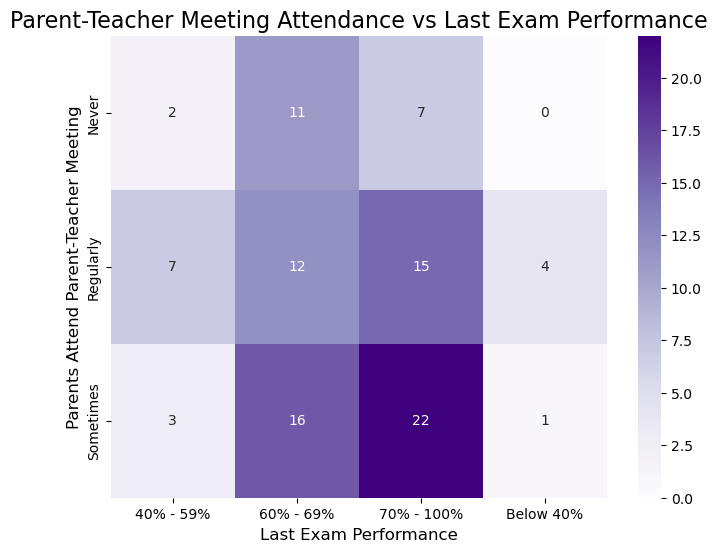

Last Exam Performance,40% - 59%,60% - 69%,70% - 100%,Below 40%
Parents Attend Parent-Teacher Meeting,,,,
Never,2,11,7,0
Regularly,7,12,15,4
Sometimes,3,16,22,1


In [45]:
# Contingency table for Parents Attend Parent-Teacher Meeting and Last Exam Performance
parents_meeting_performance = pd.crosstab(df['Parents Attend Parent-Teacher Meeting'], df['Last Exam Performance'])

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(parents_meeting_performance, annot=True, cmap='Purples', fmt='d')
plt.title('Parent-Teacher Meeting Attendance vs Last Exam Performance', fontsize=16)
plt.xlabel('Last Exam Performance', fontsize=12)
plt.ylabel('Parents Attend Parent-Teacher Meeting', fontsize=12)
image_path = '../../../docs/8.png'  
plt.savefig(image_path)
plt.show()

parents_meeting_performance

### Insight: Parent-Teacher Meeting Attendance vs. Student Performance

- **Students whose parents *Never* attend parent-teacher meetings**: These students generally perform less well academically, with only **7 students** scoring between **70% - 100%** and **11 students** in the **60% - 69%** range. No students whose parents never attend meetings scored below **40%**, but their overall performance skews lower.

- **Students whose parents attend meetings *Regularly***: Regular parental involvement correlates with better student performance. **15 students** scored in the **70% - 100%** range, and **12 students** in the **60% - 69%** range. However, **4 students** did score below **40%**, suggesting that even regular involvement doesn’t guarantee top performance for all students.

- **Students whose parents attend meetings *Sometimes***: This group has the highest number of students in the top performance bracket, with **22 students** scoring between **70% - 100%**. However, it also has the largest number of students scoring in the **60% - 69%** range (**16 students**), indicating that occasional parental engagement might still be impactful.

Overall, **regular or occasional attendance** at parent-teacher meetings appears to be linked to higher performance , especially for students scoring in the **70% - 100%** range. Because this is the point where parent can find a means to correct their child when they are going astray.
